<a href="https://colab.research.google.com/github/nilabja10201992/Cryptocurrency-Price-Prediction/blob/master/comparewithtimestepsmallw_l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,la;q=0.8,hi;q=0.7,fr;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/1346/330249/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556728085&Signature=XGXS3hu63l4vMnFgnrKdryrBxzOedh6xVvzb2OOevAEcPMUAB7PtYA5VA%2BLQvfZ8KsbH5jAgx2UH3ZB0qf8LueI11aT4NyjHsrW4lcKUVh9ydPdFoz4UukeP%2BNHA5JT0cBx7%2BBcarqyPuICUpdcdlB0PM7Qgcze3Cz0BgfvnXgtMs7kacjbM1l7vGTnTJSxuLBnMSBwugGO7D6Pnd6jQqLr%2BrXmkr2myfKB8n61Y6yzg38KAvMgqiThT7betBTa0k7ect7KcmSlPyu3dYZ4tLfg6DeNpTi9nKn8i%2FazRO6mFj%2BbpMqJdNxwd%2FMGDG86v%2BLAnbfmyGRtEBby4ZsqYmA%3D%3D" -O "bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip" -c

--2019-04-29 10:25:40--  https://storage.googleapis.com/kaggle-datasets/1346/330249/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556728085&Signature=XGXS3hu63l4vMnFgnrKdryrBxzOedh6xVvzb2OOevAEcPMUAB7PtYA5VA%2BLQvfZ8KsbH5jAgx2UH3ZB0qf8LueI11aT4NyjHsrW4lcKUVh9ydPdFoz4UukeP%2BNHA5JT0cBx7%2BBcarqyPuICUpdcdlB0PM7Qgcze3Cz0BgfvnXgtMs7kacjbM1l7vGTnTJSxuLBnMSBwugGO7D6Pnd6jQqLr%2BrXmkr2myfKB8n61Y6yzg38KAvMgqiThT7betBTa0k7ect7KcmSlPyu3dYZ4tLfg6DeNpTi9nKn8i%2FazRO6mFj%2BbpMqJdNxwd%2FMGDG86v%2BLAnbfmyGRtEBby4ZsqYmA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71025792 (68M) [application/zip]
Saving to: ‘bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip’

bitstampUSD_1-min_d 100%[===================>]  67.7

In [2]:
!unzip bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip

Archive:  bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv  


In [3]:
!ls

bitcoin-tweets-and-price.zip
bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv
bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip
Data_To_Hourervals_no_filter.csv
kaggle.json
sample_data


In [0]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, CuDNNLSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [22]:
train_df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")
train_df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.778817e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06
mean,1.438908e+09,2.654668e+03,2.656783e+03,2.652286e+03,2.654650e+03,1.068140e+01,2.395856e+04,2.654510e+03
std,6.561491e+07,3.529553e+03,3.533184e+03,3.525347e+03,3.529522e+03,3.476243e+01,8.829950e+04,3.529271e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.382000e+09,3.489800e+02,3.491500e+02,3.487800e+02,3.489900e+02,4.500000e-01,2.480382e+02,3.489681e+02
50%,1.439071e+09,6.595600e+02,6.600000e+02,6.589900e+02,6.596200e+02,2.095163e+00,1.814312e+03,6.595521e+02
75%,1.495753e+09,4.045492e+03,4.049115e+03,4.042050e+03,4.045400e+03,8.284949e+00,1.303504e+04,4.045115e+03
max,1.552435e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


In [23]:
a = train_df[2500000:].fillna(method="backfill")
a.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2500000,1475706240,610.97,610.97,610.97,610.97,0.018135,11.080002,610.97
2500001,1475706300,610.97,610.97,610.97,610.97,0.018135,11.080002,610.97
2500002,1475706360,610.97,610.97,610.97,610.97,0.018135,11.080002,610.97
2500003,1475706420,610.97,610.97,610.97,610.97,0.018135,11.080002,610.97
2500004,1475706480,610.83,610.83,610.83,610.83,0.677783,414.010001,610.83


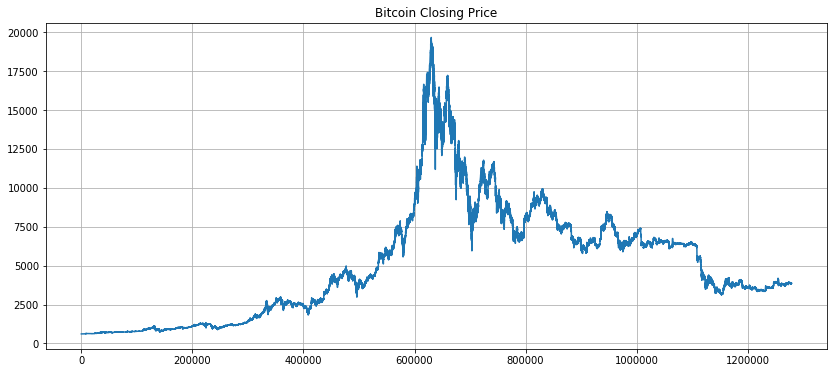

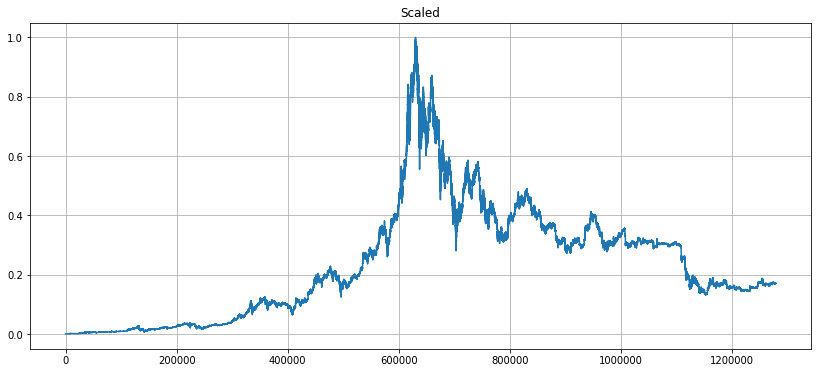

In [24]:
weighted_price = np.array(a.iloc[:,[7]])
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(weighted_price)
sclow = MinMaxScaler()
low_price = np.array(a.iloc[:,[3]])
low_priceSC = sclow.fit_transform(low_price)
sc = MinMaxScaler()
weighted_priceSC = sc.fit_transform(weighted_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(weighted_priceSC)

In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += abs(y_true[i+1] - y_true[i])
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [0]:
def func(hidden_unit, idx):
    timestep = 60
    X = []
    y = []
    for i in range(timestep, len(weighted_priceSC)):
        X.append(weighted_priceSC[i-timestep:i, :])
        y.append(low_priceSC[i])
    X, y = np.array(X), np.array(y)
    #print(X.shape, y.shape)
    X_train = X[:1000000,:]
    X_test = X[1000000:,:]

    y_train = y[:1000000]
    y_test = y[1000000:]
    %%time
    # The LSTM architecture
    regressor = Sequential()
    # First LSTM layer with Dropout regularisation
    regressor.add(CuDNNLSTM(units=hidden_unit, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regressor.add(Dropout(0.2))
    # Second LSTM layer
    regressor.add(CuDNNLSTM(units=hidden_unit, return_sequences=True))
    regressor.add(Dropout(0.2))
    # Third LSTM layer
    regressor.add(CuDNNLSTM(units=hidden_unit, return_sequences=True))
    regressor.add(Dropout(0.5))
    # Fourth LSTM layer
    regressor.add(CuDNNLSTM(units=hidden_unit))
    regressor.add(Dropout(0.5))
    # The output layer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    regressor.compile(optimizer='adam', loss='mean_absolute_error')
    # Fitting to the training set
    regressor.fit(X_train, y_train, epochs=1, batch_size=2048)
    #regressor.save('modelw_l'+str(idx)+'.h5')
#     regressor = tf.keras.models.load_model('modelw_l'+str(idx)+'.h5')
    y_pred = regressor.predict(X_test)
    return mean_absolute_error(y_test, y_pred), systematic_mean_absolute_percentage_error(y_test, y_pred), mean_absolute_scaled_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

In [28]:
mae_l = []
smape_l = []
mase_l = []
mse_l = []
for i in range(30,151, 30):
    print(i)
    mae, smape, mase, mse = func(i,i)
    mae_l.append(mae)
    smape_l.append(smape)
    mase_l.append(mase)
    mse_l.append(mse)

30
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Epoch 1/1
1000000/1000000 [==============================] - 23s 23us/step - loss: 0.0367
60
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
Epoch 1/1
1000000/1000000 [==============================] - 41s 41us/step - loss: 0.0277
90
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs
Epoch 1/1
1000000/1000000 [==============================] - 64s 64us/step - loss: 0.0246
120
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/1
1000000/1000000 [==============================] - 84s 84us/step - loss: 0.0212
150
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs
Epoch 1/1
1000000/1000000 [==============================] - 140s 140us/step - loss: 0.0201


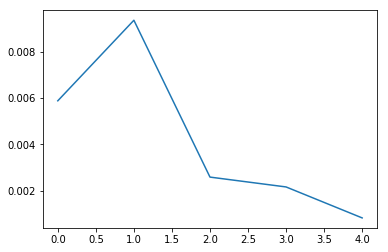

In [29]:
plt.plot(mae_l)

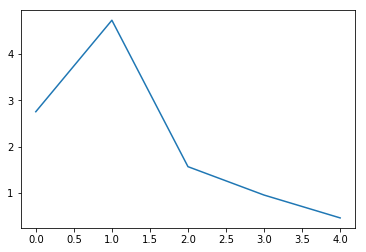

In [30]:
plt.plot(smape_l)

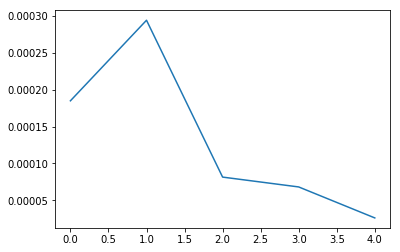

In [31]:
plt.plot(mase_l)

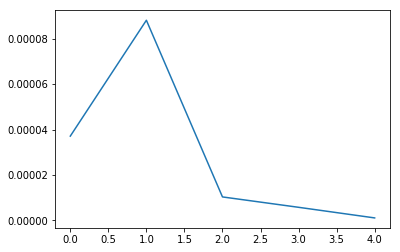

In [32]:
plt.plot(mse_l)

In [33]:
print("Units = 30 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[0],smape_l[0], mase_l[0], mse_l[0]))

Units = 30 in each hidden layer:
Mean absolute error 0.005884532497724475
Systematic mean absolute percentage error 2.7518983935199715 
Mean_absolute_scaled_error 0.00018499542575461044
Mean square error 3.711769280369097e-05


In [34]:
print("Units = 60 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[1],smape_l[1], mase_l[1], mse_l[1]))

Units = 60 in each hidden layer:
Mean absolute error 0.009359219092645754
Systematic mean absolute percentage error 4.727561389460741 
Mean_absolute_scaled_error 0.00029423114265138674
Mean square error 8.814463990884981e-05


In [35]:
print("Units = 90 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[2],smape_l[2], mase_l[2], mse_l[2]))

Units = 90 in each hidden layer:
Mean absolute error 0.002593900424931394
Systematic mean absolute percentage error 1.5648365420140289 
Mean_absolute_scaled_error 8.15459365142115e-05
Mean square error 1.0344166716115811e-05


In [36]:
print("Units = 120 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[3],smape_l[3], mase_l[3], mse_l[3]))

Units = 120 in each hidden layer:
Mean absolute error 0.002169109310367689
Systematic mean absolute percentage error 0.9515108697588858 
Mean_absolute_scaled_error 6.81915344226468e-05
Mean square error 5.775739281771659e-06


In [37]:
print("Units = 150 in each hidden layer:\nMean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mae_l[4],smape_l[4], mase_l[4], mse_l[4]))

Units = 150 in each hidden layer:
Mean absolute error 0.0008332140833576321
Systematic mean absolute percentage error 0.4578468828279557 
Mean_absolute_scaled_error 2.619422938952023e-05
Mean square error 1.1022650837543477e-06
